In [1]:
import pandas as pd

# Load the data from the uploaded CSV file
file_path = 'task_info_with_decision_10w_5fixedS_100D_1500Vdrl.csv'
file_path = 'sample_data.csv'
data = pd.read_csv(file_path, header=None)

# Assign column names based on the provided description
column_names = [
    'Node_ID', 'Packet_Length', 
    'Node_X', 'Node_Y', 
    'Server0_X', 'Server0_Y', 
    'Server1_X', 'Server1_Y', 
    'Server2_X', 'Server2_Y', 
    'Server3_X', 'Server3_Y', 
    'Server4_X', 'Server4_Y', 
    'Assigned_Server'
]

data.columns = column_names

# Display the first few rows to confirm
data.head()


In [11]:
import matplotlib.pyplot as plt

In [12]:
def adaptively_label_dataset(file_path):
    # 加载数据集，没有表头
    data = pd.read_csv(file_path, header=None)
    
    # 确定列数
    num_columns = data.shape[1]
    
    # 根据列数确定服务器的数量
    num_servers = (num_columns - 4) // 2
    
    # 动态生成列名
    column_names = ['Node_ID', 'Packet_Length', 'Node_X', 'Node_Y']
    
    for i in range(num_servers):
        column_names.append(f'Server{i}_X')
        column_names.append(f'Server{i}_Y')
    
    column_names.append('Assigned_Server')
    
    # 为数据分配列名
    data.columns = column_names
    
    # 按 'Node_ID' 和 'Assigned_Server' 组合去重
    data = data.drop_duplicates(subset=['Node_ID', 'Assigned_Server'])
    
    return data

# Use the function to label the dataset
labeled_data = adaptively_label_dataset(file_path)




#再做一次去重

# Display the first few rows to confirm
labeled_data.head()


(650, 25)

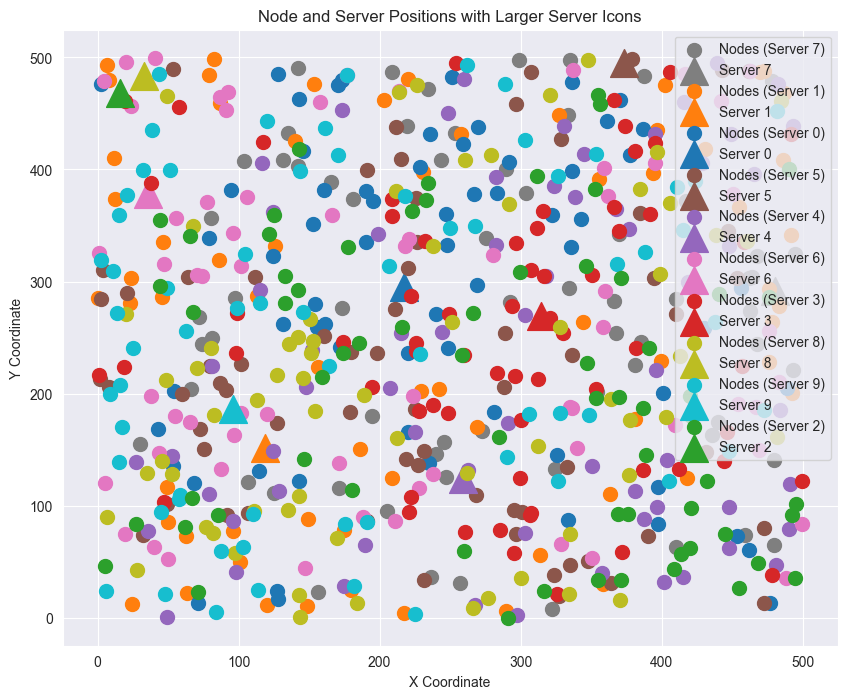

In [23]:
labeled_data.shape

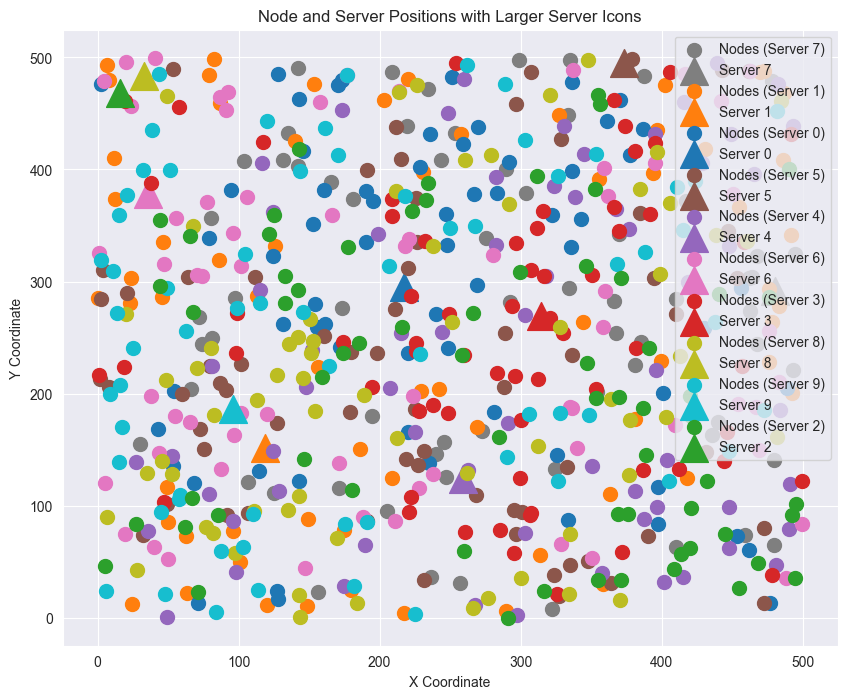

In [14]:
def plot_nodes_and_servers_corrected(data):
    plt.figure(figsize=(10, 8))
    
    # Define a colormap for different servers
    colormap = plt.cm.get_cmap('tab10', len(data['Assigned_Server'].unique()))
    
    # Plot nodes and their assigned servers using the same color
    for server_id in data['Assigned_Server'].unique():
        # Plot nodes assigned to the server
        assigned_nodes = data[data['Assigned_Server'] == server_id]
        plt.scatter(assigned_nodes['Node_X'], assigned_nodes['Node_Y'], 
                    s=100, c=[colormap(server_id)], label=f'Nodes (Server {server_id})', marker='o')

        # Plot the server with a larger icon
        server_x = data[f'Server{int(server_id)}_X'].iloc[0]
        server_y = data[f'Server{int(server_id)}_Y'].iloc[0]
        plt.scatter(server_x, server_y, s=400, c=[colormap(server_id)], label=f'Server {server_id}', marker='^')

    # Labeling the plot
    plt.title('Node and Server Positions with Larger Server Icons')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend(loc='best')
    plt.grid(True)

    # Show plot
    plt.show()

# Plot the nodes and servers with corrected server ID handling
plot_nodes_and_servers_corrected(labeled_data)


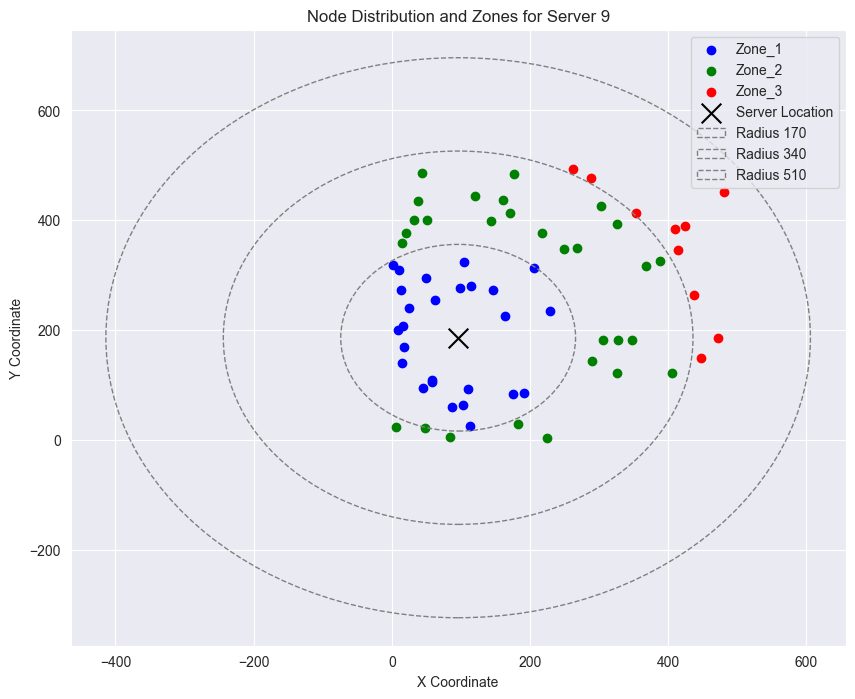

Node 0 to Server at (96.09841800626768, 185.94244203702763): Path = [0, 65]
Node 1 to Server at (96.09841800626768, 185.94244203702763): Path = [1, 0, 65]
Node 2 to Server at (96.09841800626768, 185.94244203702763): Path = [2, 65]
Node 3 to Server at (96.09841800626768, 185.94244203702763): Path = [3, 65]
Node 4 to Server at (96.09841800626768, 185.94244203702763): Path = [4, 65]
Node 5 to Server at (96.09841800626768, 185.94244203702763): Path = [5, 65]
Node 6 to Server at (96.09841800626768, 185.94244203702763): Path = [6, 65]
Node 7 to Server at (96.09841800626768, 185.94244203702763): Path = [7, 0, 65]
Node 8 to Server at (96.09841800626768, 185.94244203702763): Path = [8, 65]
Node 9 to Server at (96.09841800626768, 185.94244203702763): Path = [9, 65]
Node 10 to Server at (96.09841800626768, 185.94244203702763): Path = [10, 0, 65]
Node 11 to Server at (96.09841800626768, 185.94244203702763): Path = [11, 65]
Node 12 to Server at (96.09841800626768, 185.94244203702763): Path = [12, 6

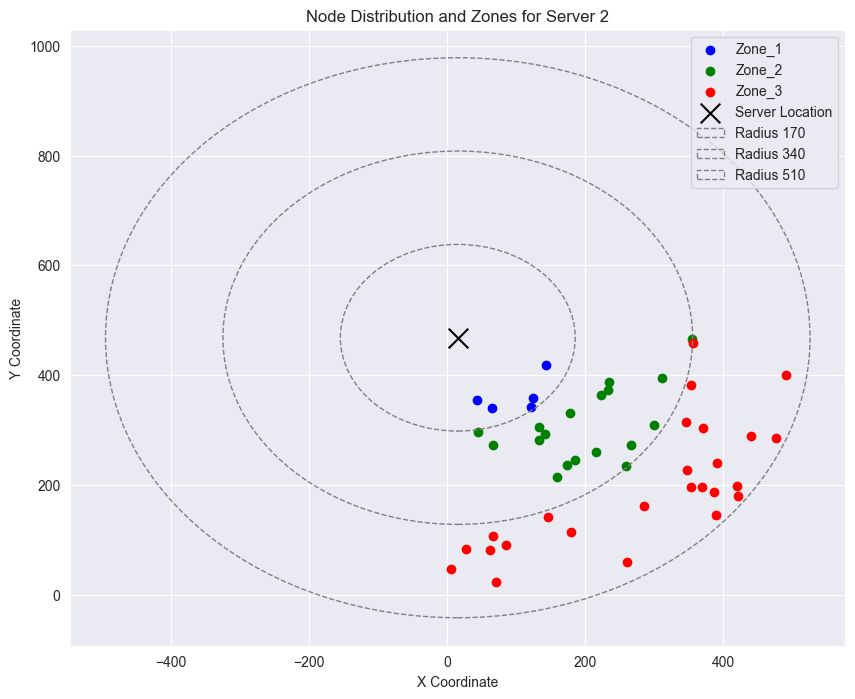

Node 0 to Server at (15.594475813113352, 468.1528583895236): Path = [0, 17, 9, 48]
Node 1 to Server at (15.594475813113352, 468.1528583895236): Path = [1, 22, 9, 48]
Node 2 to Server at (15.594475813113352, 468.1528583895236): Path = [2, 22, 9, 48]
Node 3 to Server at (15.594475813113352, 468.1528583895236): Path = [3, 17, 9, 48]
Node 4 to Server at (15.594475813113352, 468.1528583895236): Path = [4, 17, 9, 48]
Node 5 to Server at (15.594475813113352, 468.1528583895236): Path = [5, 17, 9, 48]
Node 6 to Server at (15.594475813113352, 468.1528583895236): Path = [6, 17, 9, 48]
Node 7 to Server at (15.594475813113352, 468.1528583895236): Path = [7, 9, 48]
Node 8 to Server at (15.594475813113352, 468.1528583895236): Path = [8, 9, 48]
Node 9 to Server at (15.594475813113352, 468.1528583895236): Path = [9, 48]
Node 10 to Server at (15.594475813113352, 468.1528583895236): Path = [10, 9, 48]
Node 11 to Server at (15.594475813113352, 468.1528583895236): Path = [11, 9, 48]
Node 12 to Server at (1

In [22]:
#第一步，写一个函数，遍历每一个服务器节点，然后提取数据，数据格式为 dict[服务器id]：该服务器对应的所有节点数据

In [16]:
#过滤数据
import numpy as np
def filter_nodes_by_distance(labeled_data, max_distance=510):
    filtered_rows = []
    
    for index, row in labeled_data.iterrows():
        server_id = int(row['Assigned_Server'])
        server_x = row[f'Server{server_id}_X']
        server_y = row[f'Server{server_id}_Y']
        node_x = row['Node_X']
        node_y = row['Node_Y']
        
        # 计算节点到服务器的距离
        distance = np.sqrt((node_x - server_x) ** 2 + (node_y - server_y) ** 2)
        
        # 如果距离小于等于510，则保留该节点
        if distance <= max_distance:
            filtered_rows.append(row)
    
    # 使用 pd.concat 而不是 pd.DataFrame.append
    filtered_data = pd.concat(filtered_rows, axis=1).T
    
    return filtered_data
            

    return filtered_data
labeled_data=filter_nodes_by_distance(labeled_data)
labeled_data["Node_ID"]=labeled_data["Node_ID"].apply(lambda x:int(x))
labeled_data["Assigned_Server"]=labeled_data["Assigned_Server"].apply(lambda x:int(x))

Node 0 to Server at (15.594475813113352, 468.1528583895236): Path = [0, 17, 9, 48]
Node 1 to Server at (15.594475813113352, 468.1528583895236): Path = [1, 22, 9, 48]
Node 2 to Server at (15.594475813113352, 468.1528583895236): Path = [2, 22, 9, 48]
Node 3 to Server at (15.594475813113352, 468.1528583895236): Path = [3, 17, 9, 48]
Node 4 to Server at (15.594475813113352, 468.1528583895236): Path = [4, 17, 9, 48]
Node 5 to Server at (15.594475813113352, 468.1528583895236): Path = [5, 17, 9, 48]
Node 6 to Server at (15.594475813113352, 468.1528583895236): Path = [6, 17, 9, 48]
Node 7 to Server at (15.594475813113352, 468.1528583895236): Path = [7, 9, 48]
Node 8 to Server at (15.594475813113352, 468.1528583895236): Path = [8, 9, 48]
Node 9 to Server at (15.594475813113352, 468.1528583895236): Path = [9, 48]
Node 10 to Server at (15.594475813113352, 468.1528583895236): Path = [10, 9, 48]
Node 11 to Server at (15.594475813113352, 468.1528583895236): Path = [11, 9, 48]
Node 12 to Server at (1

In [10]:
labeled_data.shape

IndexError: index 101 is out of bounds for axis 1 with size 101

In [8]:
def extract_server_node_data(labeled_data):
    # Create an empty dictionary to store server node data
    server_node_data = {}
    
    # Get the unique server IDs
    unique_servers = labeled_data['Assigned_Server'].unique()
    
    # Iterate over each server ID
    for server_id in unique_servers:
        # Extract the data corresponding to the current server
        server_data = labeled_data[labeled_data['Assigned_Server'] == server_id]
        # Store the data in the dictionary with server ID as the key
        server_node_data[server_id] = server_data
    
    return server_node_data

# Apply the function to the labeled dataset
server_node_data = extract_server_node_data(labeled_data)

# Display the keys (server IDs) and the corresponding number of nodes for each server as a summary
server_node_data_summary = {server_id: data.shape[0] for server_id, data in server_node_data.items()}
server_node_data_summary


Value of N: 101


In [7]:
#一个字典取每个server对应的坐标 dict[服务器id]：该服务器对应的坐标

{1: (406.5920102, 107.9836457),
 0: (38.30411212, 110.0640944),
 3: (212.881181, 497.6775831),
 4: (423.1404708, 350.8391073),
 2: (467.613463, 332.2602715)}

In [43]:
def extract_server_coordinates(labeled_data):
    # Create an empty dictionary to store server coordinates
    server_coordinates = {}
    
    # Get the unique server IDs
    unique_servers = labeled_data['Assigned_Server'].unique()
    
    # Iterate over each server ID
    for server_id in unique_servers:
        # Extract the X and Y coordinates for the server
        server_x = labeled_data[f'Server{int(server_id)}_X'].iloc[0]
        server_y = labeled_data[f'Server{int(server_id)}_Y'].iloc[0]
        # Store the coordinates as a tuple in the dictionary
        server_coordinates[server_id] = (server_x, server_y)
    
    return server_coordinates

# Apply the function to the labeled dataset
server_coordinates = extract_server_coordinates(labeled_data)

# Display the server coordinates
server_coordinates


,Node_ID,Packet_Length,Node_X,Node_Y,Distance,Distance_Category,Layer,SNR_to_Server,Distance_to_Server
13,13,11697.0,311.046074,158.671686,233.765576,Zone_2,2.0,0.004260,233.765576
15,15,11239.0,468.095098,219.785203,112.476100,Zone_1,1.0,0.008812,112.476100
18,18,11906.0,350.823936,243.266322,146.832274,Zone_1,1.0,0.006764,146.832274
35,35,11828.0,343.689085,360.926611,127.196739,Zone_1,1.0,0.007801,127.196739
38,38,11400.0,375.608566,240.515802,129.930554,Zone_1,1.0,0.007638,129.930554
50,50,11761.0,317.610176,216.488450,189.483774,Zone_2,2.0,0.005250,189.483774
55,55,11675.0,437.292926,461.630816,132.876155,Zone_1,1.0,0.007470,132.876155
57,57,11793.0,387.402176,445.119687,138.459735,Zone_1,1.0,0.007171,138.459735
58,58,11726.0,238.695421,177.029356,276.586527,Zone_2,2.0,0.003602,276.586527
60,60,11892.0,185.584508,257.666934,291.726752,Zone_2,2.0,0.003416,291.726752


In [25]:
#对节点进行分类函数

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def divide_nodes_by_fixed_distance(server_node_data, server_coordinates, server_id, max_radius=170):
    # Get the server coordinates
    server_x, server_y = server_coordinates[server_id]
    
    # Extract the nodes assigned to the server and make a copy
    nodes_data = server_node_data[server_id].copy()
    
    # Calculate the distance of each node from the server
    nodes_data['Distance'] = np.sqrt((nodes_data['Node_X'] - server_x)**2 + 
                                     (nodes_data['Node_Y'] - server_y)**2)
    
    # Define fixed thresholds based on the max_radius parameter
    thresholds = [max_radius, 2 * max_radius, 3 * max_radius]
    
    # Assign distance category based on fixed thresholds
    conditions = [
        (nodes_data['Distance'] <= thresholds[0]),
        (nodes_data['Distance'] > thresholds[0]) & (nodes_data['Distance'] <= thresholds[1]),
        (nodes_data['Distance'] > thresholds[1]) & (nodes_data['Distance'] <= thresholds[2])
    ]
    
    choices = ['Zone_1', 'Zone_2', 'Zone_3']
    
    nodes_data['Distance_Category'] = np.select(conditions, choices, default=np.nan)
    
    # Remove nodes with a distance greater than 3 * max_radius
    nodes_data = nodes_data.dropna(subset=['Distance_Category'])
    
    return nodes_data[['Node_ID', 'Node_X', 'Node_Y', 'Distance', 'Distance_Category']]

def plot_server_zones(nodes_data, server_coordinates, server_id, max_radius=170):
    server_x, server_y = server_coordinates[server_id]
    
    plt.figure(figsize=(10, 8))
    
    colors = {'Zone_1': 'blue', 'Zone_2': 'green', 'Zone_3': 'red'}
    
    for zone, color in colors.items():
        zone_data = nodes_data[nodes_data['Distance_Category'] == zone]
        plt.scatter(zone_data['Node_X'], zone_data['Node_Y'], color=color, label=zone)
    
    plt.scatter(server_x, server_y, color='black', s=200, marker='x', label='Server Location')
    
    # Draw circles with the given max_radius
    for i in range(1, 4):
        circle = plt.Circle((server_x, server_y), i * max_radius, color='gray', fill=False, linestyle='--', label=f'Radius {i * max_radius}')
        plt.gca().add_patch(circle)
    
    # Add labels and legend
    plt.title(f'Node Distribution and Zones for Server {server_id}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid(True)
    
    # Show plot
    plt.show()

# Apply the function to the specific server's data (server_id = 3)
max_radius = 170  # This is the configurable radius parameter
server_nodes_data_filtered = divide_nodes_by_fixed_distance(server_node_data, server_coordinates, server_id=3, max_radius=max_radius)

# Plot the zones
plot_server_zones(server_nodes_data_filtered, server_coordinates, server_id=3, max_radius=max_radius)


In [25]:
server_nodes_data_filtered

In [85]:
import numpy as np
import pandas as pd

import numpy as np

def Qlearning_NLPS_routing(S, server_index, Layer, SNRMat, alpha=0.5, gamma=0.9, epsion=1e-3, N=100, max_distance=170):
    maxL = Layer[S]
    M = maxL - 1

    # 如果节点在最高层（Layer 1），直接连接到服务器
    if maxL == 1:
        #print(f"Node {S} is in the highest layer (1). Directly connecting to server.")
        Route = [S, server_index]
        return [], Route, np.zeros((N, N))

    # 根据分层情况存储节点
    L = []
    for m in range(1, M+1):
        L.append(np.where(Layer == maxL - m)[0])
    L = [np.array([S])] + L + [np.array([server_index])]

    # 初始化 Q 和 R 表
    Q = np.zeros((N, N))
    R = np.zeros((N, N))
    for m in range(M+1):
        R[L[m].reshape(-1, 1), L[m+1].reshape(1, -1)] = SNRMat[L[m].reshape(-1, 1), L[m+1].reshape(1, -1)]
        #print(f"R table after layer {m}: \n{R}")

        if m == M:
            Q[L[m].reshape(-1, 1), L[m+1].reshape(1, -1)] = R[L[m].reshape(-1, 1), L[m+1].reshape(1, -1)]
            #print(f"Q table initialized for the final layer {m}: \n{Q}")

    # 训练部分
    n = 1
    Re = []
    MRe = []
    s = [S]
    Route = []

    while True:
        QPre = Q.copy()
        for m in range(M):
            #print(f"Current Node: {s[m]}, Layer: {m + 1}")
            # 仅选择下一层的节点
            potential_nodes = []
            if m + 1 <= M:
                for node in L[m + 1]:
                    distance = np.linalg.norm(np.array([SNRMat[s[m], node]]))
                    #print(f"Checking Node {node} from Node {s[m]}, Distance: {distance}")
                    if distance <= max_distance:
                        potential_nodes.append(node)
            
            # 添加服务器节点到潜在节点列表中，确保路径终点是服务器
            if m == M - 1:
                potential_nodes = [server_index]
               # print(f"Adding server to potential nodes for final layer.")

            #print(f"Potential nodes for next step: {potential_nodes}")

            # 随机选择下一个节点
            if potential_nodes:
                am = np.random.choice(potential_nodes)
                #print(f"Selected next node: {am}")
            else:
                #print(f"No available nodes for Node {s[m]}, ending path selection.")
                break  # 如果没有可用节点，结束当前路径选择

            # 继续更新 Q 表
            if am == server_index:
                Qm1 = 0
                idx_am1 = -1
            else:
                Qm1, idx_am1 = Q[am, L[m+2]].max(), Q[am, L[m+2]].argmax()
            rm1 = R[s[m], am]

            if R[s[m], am] > rm1:
                Q[s[m], am] = (1 - alpha) * Q[s[m], am] + alpha * (rm1 + gamma * Qm1)
            else:
                Q[s[m], am] = (1 - alpha) * Q[s[m], am] + alpha * (R[s[m], am] + gamma * Qm1)

           # print(f"Updated Q[{s[m]}, {am}] = {Q[s[m], am]}")
            s.append(am)

        RoutePre = Route
        Route = [S]
        for m in range(M):
            idx_a = Q[Route[m], L[m+1]].argmax()
            Route.append(L[m+1][idx_a])
            #print(f"Route step {m+1}: Current Route: {Route}")

        SNRTemp = [SNRMat[Route[m-1], Route[m]] for m in range(1, len(Route))]
        #print(f"SNR values along the route: {SNRTemp}")

        Re.append(1/(M+1) * np.log(sum(SNRTemp) + 1))
        #print(f"Re[{n}] = {Re[-1]}")

        if n > 1 and Re[-1] < Re[-2]:
            Re[-1] = Re[-2]

        MRe.append(np.mean(Re))
        #print(f"Mean Reward after iteration {n}: {MRe[-1]}")

        if n > N * 10 and abs(MRe[-1] - MRe[-10]) < epsion:
            break
        else:
            n += 1

    Route = [S]
    for m in range(M):
        idx_a = Q[Route[m], L[m+1]].argmax()
        Route.append(L[m+1][idx_a])
    Route.append(server_index)

    #print(f"Final route for Node {S} to Server: {Route}")
    return MRe, Route, Q


def calculate_snr_matrix(nodes_data):
    # 获取节点的数量
    num_nodes = len(nodes_data)
    
    # 初始化 SNR 矩阵
    snr_matrix = np.zeros((num_nodes, num_nodes))
    
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            # 计算节点 i 和节点 j 之间的距离
            distance = np.sqrt((nodes_data.iloc[i]['Node_X'] - nodes_data.iloc[j]['Node_X']) ** 2 +
                               (nodes_data.iloc[i]['Node_Y'] - nodes_data.iloc[j]['Node_Y']) ** 2)
            
            # 根据距离计算 SNR，这里假设 SNR = 1 / (距离 + 1)
            snr = 1 / (distance + 1)
            
            # 对称地填充 SNR 矩阵
            snr_matrix[i, j] = snr
            snr_matrix[j, i] = snr
    
    return snr_matrix

def calculate_snr_to_server(nodes_data, server_coord):
    distances = np.sqrt((nodes_data['Node_X'] - server_coord[0])**2 + 
                        (nodes_data['Node_Y'] - server_coord[1])**2)
    snr_to_server = 1 / (distances + 1)  # 使用 SNR = 1 / (距离 + 1) 的公式
    return snr_to_server, distances

# 使用之前的数据集 server_3_nodes_data_filtered
nodes_data = server_nodes_data_filtered.copy()
server_id=3
# 创建 Layer 信息
layer_mapping = {'Zone_1': 1, 'Zone_2': 2, 'Zone_3': 3}
nodes_data['Layer'] = nodes_data['Distance_Category'].map(layer_mapping)

# 获取服务器的坐标
server_coord = server_coordinates[server_id]  # 假设 server_id 是服务器的唯一标识符
server_index = len(nodes_data)  # 服务器作为最后一个节点

# 计算每个节点到服务器的距离和 SNR
nodes_data['SNR_to_Server'], nodes_data['Distance_to_Server'] = calculate_snr_to_server(nodes_data, server_coord)

# 计算 SNR 矩阵
snr_matrix = calculate_snr_matrix(nodes_data)

# 更新节点数量，包括服务器节点
N = len(nodes_data) + 1

# 构建扩展后的 SNR 矩阵
extended_snr_matrix = np.zeros((N, N))
extended_snr_matrix[:-1, :-1] = snr_matrix  # 原始 SNR 矩阵
extended_snr_matrix[:-1, -1] = nodes_data['SNR_to_Server'].values  # 最后一列是到服务器的 SNR
extended_snr_matrix[-1, :-1] = nodes_data['SNR_to_Server'].values  # 最后一行是到服务器的 SNR

# 存储每个节点路径的字典
routes_dict = {}

# 遍历所有节点，找到到服务器的最优路径
for S in range(len(nodes_data)):#:
    # 定义 Layer 和 SNR 矩阵，包含服务器节点的信息
    Layer = nodes_data['Layer'].values
    Layer = np.append(Layer, 0)  # 服务器在层级 0（可以认为它是层级最高的）
    
    # 计算路径
    MRe, Route, Q = Qlearning_NLPS_routing(S, server_index, Layer, extended_snr_matrix, N=N, max_distance=170)
    
    # 储存路径
    routes_dict[S] = Route

# 打印字典中一些路径的示例
for node, path in routes_dict.items():
    print(f"Node {node} to Server at {server_coord}: Path = {path}")


,Node_ID,Packet_Length,Node_X,Node_Y,Distance,Distance_Category
6,6,11699.0,58.004729,340.875677,220.394087,Zone_2
10,10,11564.0,104.931685,208.271381,308.883544,Zone_2
12,12,11377.0,292.182841,495.637636,79.327893,Zone_1
16,16,11961.0,105.831565,450.924643,116.813773,Zone_1
27,27,11592.0,389.088407,492.093895,176.295672,Zone_2
...,...,...,...,...,...,...
259,59,11975.0,154.201700,469.241658,65.206467,Zone_1
268,68,11837.0,21.160453,232.433905,327.278240,Zone_2
293,93,11994.0,52.006563,286.971987,265.099021,Zone_2
296,96,11229.0,30.878792,473.526652,183.597759,Zone_2


In [86]:
nodes_data

Node 0 to Server at (212.881181, 497.6775831): Path = [0, 2, 61]
Node 1 to Server at (212.881181, 497.6775831): Path = [1, 2, 61]
Node 2 to Server at (212.881181, 497.6775831): Path = [2, 61]
Node 3 to Server at (212.881181, 497.6775831): Path = [3, 61]
Node 4 to Server at (212.881181, 497.6775831): Path = [4, 2, 61]
Node 5 to Server at (212.881181, 497.6775831): Path = [5, 2, 61]
Node 6 to Server at (212.881181, 497.6775831): Path = [6, 2, 61]
Node 7 to Server at (212.881181, 497.6775831): Path = [7, 2, 61]
Node 8 to Server at (212.881181, 497.6775831): Path = [8, 49, 2, 61]
Node 9 to Server at (212.881181, 497.6775831): Path = [9, 2, 61]
Node 10 to Server at (212.881181, 497.6775831): Path = [10, 2, 61]
Node 11 to Server at (212.881181, 497.6775831): Path = [11, 2, 61]
Node 12 to Server at (212.881181, 497.6775831): Path = [12, 61]
Node 13 to Server at (212.881181, 497.6775831): Path = [13, 2, 61]
Node 14 to Server at (212.881181, 497.6775831): Path = [14, 61]
Node 15 to Server at (2

In [87]:
# 验证路径层级顺序
def verify_path_layers(routes_dict, nodes_data, server_index):
    for node, path in routes_dict.items():
        # 获取路径中各节点的层级
        layers = [nodes_data.iloc[node_id]['Layer'] if node_id != server_index else 0 for node_id in path]

        # 检查层级是否按递减顺序排列
        if layers != sorted(layers, reverse=True):
            print(f"Path for Node {node} does not follow a decreasing layer order: {layers}")
        else:
            print(f"Path for Node {node} is valid: {layers}")

# 假设 routes_dict 和 nodes_data 已经生成，server_index 是服务器的索引
verify_path_layers(routes_dict, nodes_data, server_index)


,Node_ID,Packet_Length,Node_X,Node_Y,Distance,Distance_Category,Layer,SNR_to_Server,Distance_to_Server
6,6,11699.0,58.004729,340.875677,220.394087,Zone_2,2,0.004517,220.394087
10,10,11564.0,104.931685,208.271381,308.883544,Zone_2,2,0.003227,308.883544
12,12,11377.0,292.182841,495.637636,79.327893,Zone_1,1,0.012449,79.327893
16,16,11961.0,105.831565,450.924643,116.813773,Zone_1,1,0.008488,116.813773
27,27,11592.0,389.088407,492.093895,176.295672,Zone_2,2,0.005640,176.295672
...,...,...,...,...,...,...,...,...,...
259,59,11975.0,154.201700,469.241658,65.206467,Zone_1,1,0.015104,65.206467
268,68,11837.0,21.160453,232.433905,327.278240,Zone_2,2,0.003046,327.278240
293,93,11994.0,52.006563,286.971987,265.099021,Zone_2,2,0.003758,265.099021
296,96,11229.0,30.878792,473.526652,183.597759,Zone_2,2,0.005417,183.597759


In [88]:
import numpy as np

# def gertTimeSlotAndTimeSINR(RouteAll, PMat, maxRecNum, eta, B, N, L):
#     # Initialize SINR matrix and TimeSlot list
#     SINR = np.zeros((N, N))
#     TimeSlot = []
#     currentIdx = np.ones(len(RouteAll), dtype=int)
# 
#     while True:
#         SendNode = np.zeros(N)  # Record how many times a node is a sender
#         RecNode = np.zeros(N)   # Record how many times a node is a receiver
#         Path = []
# 
#         for i in range(len(RouteAll)):
#             if currentIdx[i] == len(RouteAll[i]):
#                 continue
#             for j in range(currentIdx[i], len(RouteAll[i]) - 1):
#                 s = RouteAll[i][j]
#                 d = RouteAll[i][j + 1]
#                 if SendNode[s] < maxRecNum and RecNode[s] == 0 and SendNode[d] == 0 and RecNode[d] < maxRecNum:
#                     currentIdx[i] += 1
#                     SendNode[s] += 1
#                     RecNode[d] += 1
#                     Path.append([s, d])
# 
#         if Path:
#             TimeSlot.append(np.array(Path))
#         else:
#             break
# 
#     # Calculate Transmission Time and update SINR matrix
#     Time = []
#     for slot in TimeSlot:
#         rData = []
#         P = np.array([PMat[s, d] for s, d in slot])
# 
#         RecNode = np.unique(slot[:, 1])
#         for rec in RecNode:
#             ind = np.where(slot[:, 1] == rec)[0]
#             P1 = np.sum(P[ind])
#             P2 = np.sum(P) - P1
#             sinr = P1 / (P2 + eta * B)
# 
#             for k in ind:
#                 s, d = slot[k]
#                 sinrtemp = SINR[s, d]
#                 if sinr >= sinrtemp:
#                     SINR[s, d] = sinr
#                     SINR[d, s] = sinr
# 
#             rData.append(B * np.log2(1 + sinr))
# 
#         Time.append(max(L / np.array(rData)))
# 
#     return TimeSlot, Time, SINR
def gertTimeSlotAndTimeSINR(RouteAll, PMat, maxRecNum, eta, B, N, L):
    # Initialize SINR matrix and TimeSlot list
    SINR = np.zeros((N, N))
    TimeSlot = []
    currentIdx = np.zeros(len(RouteAll), dtype=int)

    while True:
        SendNode = np.zeros(N)  # Record how many times a node is a sender
        RecNode = np.zeros(N)   # Record how many times a node is a receiver
        Path = []

        for i in range(len(RouteAll)):
            if currentIdx[i] >= len(RouteAll[i]) - 1:
                continue
            for j in range(currentIdx[i], len(RouteAll[i]) - 1):
                s = RouteAll[i][j]
                d = RouteAll[i][j + 1]
                if SendNode[s] < maxRecNum and RecNode[s] == 0 and SendNode[d] == 0 and RecNode[d] < maxRecNum:
                    currentIdx[i] += 1
                    SendNode[s] += 1
                    RecNode[d] += 1
                    Path.append([s, d])

        if Path:
            TimeSlot.append(np.array(Path))
        else:
            break

    # Calculate Transmission Time and update SINR matrix
    Time = []
    for slot in TimeSlot:
        rData = []
        P = np.array([PMat[s, d] for s, d in slot])

        RecNode = np.unique(slot[:, 1])
        for rec in RecNode:
            ind = np.where(slot[:, 1] == rec)[0]
            P1 = np.sum(P[ind])
            P2 = np.sum(P) - P1
            sinr = P1 / (P2 + eta * B)

            for k in ind:
                s, d = slot[k]
                if sinr >= SINR[s, d]:
                    SINR[s, d] = sinr
                    SINR[d, s] = sinr

            rData.append(B * np.log2(1 + sinr))

        Time.append(max(L / np.array(rData)))

    return TimeSlot, Time, SINR

# 使用前面更新的Q表进行优化后的DQNMIPS计算
def DQNMIPS(S, D, Layer, SINRMat, Q, alpha=0.5, gamma=0.9, epsion=1e-3, N=100):
    maxL = Layer[S]
    M = maxL - 1

    if maxL == 1:
        #print(f"Node {S} is in the highest layer (1). Directly connecting to server.")
        Route = [S, D]
        return [], Route, Q

    # 根据分层情况存储节点
    L = []
    for m in range(1, M+1):
        L.append(np.where(Layer == maxL - m)[0])
    L = [np.array([S])] + L + [np.array([D])]

    # 初始化 R 表
    R = np.zeros((N, N))
    for m in range(M+1):
        R[np.ix_(L[m], L[m+1])] = SINRMat[np.ix_(L[m], L[m+1])]
        #print(f"R table after layer {m}: \n{R}")

    # 训练部分
    n = 1
    Re = []
    MRe = []
    s = [S]
    Route = []

    while True:
        QPre = Q.copy()
        for m in range(M):
            #print(f"Current Node: {s[m]}, Layer: {m + 1}")
            # 随机选择下一层的节点
            idx_am = np.random.choice(len(L[m+1]))
            am = L[m+1][idx_am]
            #print(f"Selected next node: {am}")

            # 获取 maxQ(m+1) 和 a(m+1)
            if m + 2 <= M + 1:
                Qm1 = Q[am, L[m+2]].max()
                am1 = L[m+2][Q[am, L[m+2]].argmax()]
            else:
                Qm1 = 0
                am1 = D
            rm1 = R[am, am1]

            # 更新 Q 表
            if R[s[m], am] > rm1:
                Q[s[m], am] = (1 - alpha) * Q[s[m], am] + alpha * (rm1 + gamma * Qm1)
            else:
                Q[s[m], am] = (1 - alpha) * Q[s[m], am] + alpha * (R[s[m], am] + gamma * Qm1)

            #print(f"Updated Q[{s[m]}, {am}] = {Q[s[m], am]}")
            s.append(am)

        RoutePre = Route
        Route = [S]
        for m in range(M):
            idx_a = Q[Route[m], L[m+1]].argmax()
            Route.append(L[m+1][idx_a])
            #print(f"Route step {m+1}: Current Route: {Route}")

        SINRTemp = [SINRMat[Route[m-1], Route[m]] for m in range(1, len(Route))]
        #print(f"SINR values along the route: {SINRTemp}")

        Re.append(1/(M+1) * np.log(sum(SINRTemp) + 1))
        #print(f"Re[{n}] = {Re[-1]}")

        if n > 1 and Re[-1] < Re[-2]:
            Re[-1] = Re[-2]

        MRe.append(np.mean(Re))
        #print(f"Mean Reward after iteration {n}: {MRe[-1]}")

        if n > N * 10 and abs(MRe[-1] - MRe[-10]) < epsion:
            break
        else:
            n += 1

    Route = [S]
    for m in range(M):
        idx_a = Q[Route[m], L[m+1]].argmax()
        Route.append(L[m+1][idx_a])
    Route.append(D)

    #print(f"Final route for Node {S} to Server: {Route}")
    return MRe, Route, Q


Path for Node 0 is valid: [2, 1, 0]
Path for Node 1 is valid: [2, 1, 0]
Path for Node 2 is valid: [1, 0]
Path for Node 3 is valid: [1, 0]
Path for Node 4 is valid: [2, 1, 0]
Path for Node 5 is valid: [2, 1, 0]
Path for Node 6 is valid: [2, 1, 0]
Path for Node 7 is valid: [2, 1, 0]
Path for Node 8 is valid: [3, 2, 1, 0]
Path for Node 9 is valid: [2, 1, 0]
Path for Node 10 is valid: [2, 1, 0]
Path for Node 11 is valid: [2, 1, 0]
Path for Node 12 is valid: [1, 0]
Path for Node 13 is valid: [2, 1, 0]
Path for Node 14 is valid: [1, 0]
Path for Node 15 is valid: [1, 0]
Path for Node 16 is valid: [1, 0]
Path for Node 17 is valid: [1, 0]
Path for Node 18 is valid: [1, 0]
Path for Node 19 is valid: [1, 0]
Path for Node 20 is valid: [1, 0]
Path for Node 21 is valid: [1, 0]
Path for Node 22 is valid: [1, 0]
Path for Node 23 is valid: [1, 0]
Path for Node 24 is valid: [1, 0]
Path for Node 25 is valid: [1, 0]
Path for Node 26 is valid: [2, 1, 0]
Path for Node 27 is valid: [3, 2, 1, 0]
Path for Node

In [90]:
# 初始化存储优化路径的字典
optimized_routes_dict = {}

# 服务器节点的索引
D = 61  # 假设服务器节点的索引为 61

# 从现有的 routes_dict 中提取所有路径集
RouteAll = list(routes_dict.values())

# 假设 PMat 是预先定义好的功率矩阵
PMat = np.random.rand(len(nodes_data) + 1, len(nodes_data) + 1)  # 示例功率矩阵

# 计算初始的 SINR 矩阵
TimeSlot, Time, SINRMat = gertTimeSlotAndTimeSINR(RouteAll, PMat, maxRecNum=2, eta=1e-9, B=1e6, N=len(nodes_data) + 1, L=np.random.rand(len(RouteAll)) * 100)

# 初始化 Q 表，假设已经有一个初始的 Q 表
Q_initial=Q
Q = np.copy(Q_initial)

# 遍历所有节点来计算到服务器节点的最优路径
for S in range(len(nodes_data)):
    # 使用之前更新的 Q 表进行路径优化
    MRe, optimized_route, Q = DQNMIPS(S, D, nodes_data['Layer'].values, SINRMat, Q)
    
    # 将优化后的路径存储到字典中
    optimized_routes_dict[S] = optimized_route
    
    # 输出每个节点的最终优化路径
    print(f"Optimized route for Node {S} to Server at {D}: {optimized_route}")
# 现在，optimized_routes_dict 中包含了每个节点到服务器节点的最优路径, 服务器节点是61：
# Optimized route for Node 0 to Server at 61: [0, 2, 61]
# Optimized route for Node 1 to Server at 61: [1, 2, 61]
# Optimized route for Node 2 to Server at 61: [2, 61]
# Optimized route for Node 3 to Server at 61: [3, 61]
# Optimized route for Node 4 to Server at 61: [4, 2, 61]
# Optimized route for Node 5 to Server at 61: [5, 2, 61]
# Optimized route for Node 6 to Server at 61: [6, 2, 61]
# Optimized route for Node 7 to Server at 61: [7, 2, 61]

Optimized route for Node 0 to Server at 61: [0, 2, 61]
Optimized route for Node 1 to Server at 61: [1, 2, 61]
Optimized route for Node 2 to Server at 61: [2, 61]
Optimized route for Node 3 to Server at 61: [3, 61]
Optimized route for Node 4 to Server at 61: [4, 2, 61]
Optimized route for Node 5 to Server at 61: [5, 2, 61]
Optimized route for Node 6 to Server at 61: [6, 2, 61]
Optimized route for Node 7 to Server at 61: [7, 2, 61]
Optimized route for Node 8 to Server at 61: [8, 1, 2, 61]
Optimized route for Node 9 to Server at 61: [9, 2, 61]
Optimized route for Node 10 to Server at 61: [10, 2, 61]
Optimized route for Node 11 to Server at 61: [11, 2, 61]
Optimized route for Node 12 to Server at 61: [12, 61]
Optimized route for Node 13 to Server at 61: [13, 2, 61]
Optimized route for Node 14 to Server at 61: [14, 61]
Optimized route for Node 15 to Server at 61: [15, 61]
Optimized route for Node 16 to Server at 61: [16, 61]
Optimized route for Node 17 to Server at 61: [17, 61]
Optimized ro

In [91]:
TimeSlot

,Node_ID,Packet_Length,Node_X,Node_Y,Distance,Distance_Category,Layer,SNR_to_Server,Distance_to_Server
6,6,11699.0,58.004729,340.875677,220.394087,Zone_2,2,0.004517,220.394087
10,10,11564.0,104.931685,208.271381,308.883544,Zone_2,2,0.003227,308.883544
12,12,11377.0,292.182841,495.637636,79.327893,Zone_1,1,0.012449,79.327893
16,16,11961.0,105.831565,450.924643,116.813773,Zone_1,1,0.008488,116.813773
27,27,11592.0,389.088407,492.093895,176.295672,Zone_2,2,0.005640,176.295672
...,...,...,...,...,...,...,...,...,...
259,59,11975.0,154.201700,469.241658,65.206467,Zone_1,1,0.015104,65.206467
268,68,11837.0,21.160453,232.433905,327.278240,Zone_2,2,0.003046,327.278240
293,93,11994.0,52.006563,286.971987,265.099021,Zone_2,2,0.003758,265.099021
296,96,11229.0,30.878792,473.526652,183.597759,Zone_2,2,0.005417,183.597759


In [92]:
time

In [97]:
# 初始化一个字典来存储路径差异
path_differences = {}

# 遍历所有节点并比较 optimized_route 和 routes_dict 中的路径
for node, optimized_path in optimized_routes_dict.items():
    original_path = routes_dict.get(node)
    if original_path != optimized_path:
        path_differences[node] = {
            "original": original_path,
            "optimized": optimized_path
        }

# 打印有差异的路径
for node, paths in path_differences.items():
    print(f"Node {node}:")
    print(f"  Original Path:  {paths['original']}")
    print(f"  Optimized Path: {paths['optimized']}")

if not path_differences:
    print("No differences found between original and optimized paths.")
else:
    print(f"Differences found for {len(path_differences)} nodes.")


每一步的最大传输时间是: [0.08609636576665956, 0.07379138084142033, 0.004444338211398275]
每一步的最大传输时间的节点对是: [(57, 2), (1, 2), (2, 61)]
每一步的最大传输时间的路径是: [[57, 2, 61], [8, 1, 2, 61], [8, 1, 2, 61]]
总的最大传输时间是: 0.16433208481947817 秒
网络容量是: 4299111.769780585 字节/秒


,Node_ID,Packet_Length,Node_X,Node_Y,Distance,Distance_Category,Layer,SNR_to_Server,Distance_to_Server,Sequence_ID
6,6,11699.0,58.004729,340.875677,220.394087,Zone_2,2,0.004517,220.394087,0
10,10,11564.0,104.931685,208.271381,308.883544,Zone_2,2,0.003227,308.883544,1
12,12,11377.0,292.182841,495.637636,79.327893,Zone_1,1,0.012449,79.327893,2
16,16,11961.0,105.831565,450.924643,116.813773,Zone_1,1,0.008488,116.813773,3
27,27,11592.0,389.088407,492.093895,176.295672,Zone_2,2,0.005640,176.295672,4
...,...,...,...,...,...,...,...,...,...,...
259,59,11975.0,154.201700,469.241658,65.206467,Zone_1,1,0.015104,65.206467,56
268,68,11837.0,21.160453,232.433905,327.278240,Zone_2,2,0.003046,327.278240,57
293,93,11994.0,52.006563,286.971987,265.099021,Zone_2,2,0.003758,265.099021,58
296,96,11229.0,30.878792,473.526652,183.597759,Zone_2,2,0.005417,183.597759,59
